In [1]:
from sklearn.datasets import load_iris #import the iris dataset
iris_data = load_iris()

In [2]:
print(iris_data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [3]:
features = iris_data.data #get the features of the dataset
labels = iris_data.target #get the labels of the dataset

In [4]:
from sklearn.preprocessing import MinMaxScaler #import the MinMaxScaler for scaling the features
features = MinMaxScaler().fit_transform(features)

In [5]:
from sklearn.model_selection import train_test_split
from qiskit.utils import algorithm_globals #import the algorithm_globals for setting the random seed
algorithm_globals.random_seed = 123
train_features, test_features, train_labels, test_labels = train_test_split(
    features, labels, train_size=0.8, random_state=algorithm_globals.random_seed
) 

C:\Users\Asus\AppData\Local\Temp\ipykernel_9676\282151373.py:3: DeprecationWarning: The property ``qiskit.utils.algorithm_globals.QiskitAlgorithmGlobals.random_seed`` is deprecated as of qiskit 0.45.0. It will be removed no earlier than 3 months after the release date. This algorithm utility has been migrated to an independent package: https://github.com/qiskit-community/qiskit-algorithms. You can run ``pip install qiskit_algorithms`` and import ``from qiskit_algorithms.utils`` instead. 
  algorithm_globals.random_seed = 123
C:\Users\Asus\AppData\Local\Temp\ipykernel_9676\282151373.py:5: DeprecationWarning: The property ``qiskit.utils.algorithm_globals.QiskitAlgorithmGlobals.random_seed`` is deprecated as of qiskit 0.45.0. It will be removed no earlier than 3 months after the release date. This algorithm utility has been migrated to an independent package: https://github.com/qiskit-community/qiskit-algorithms. You can run ``pip install qiskit_algorithms`` and import ``from qiskit_algor

C:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


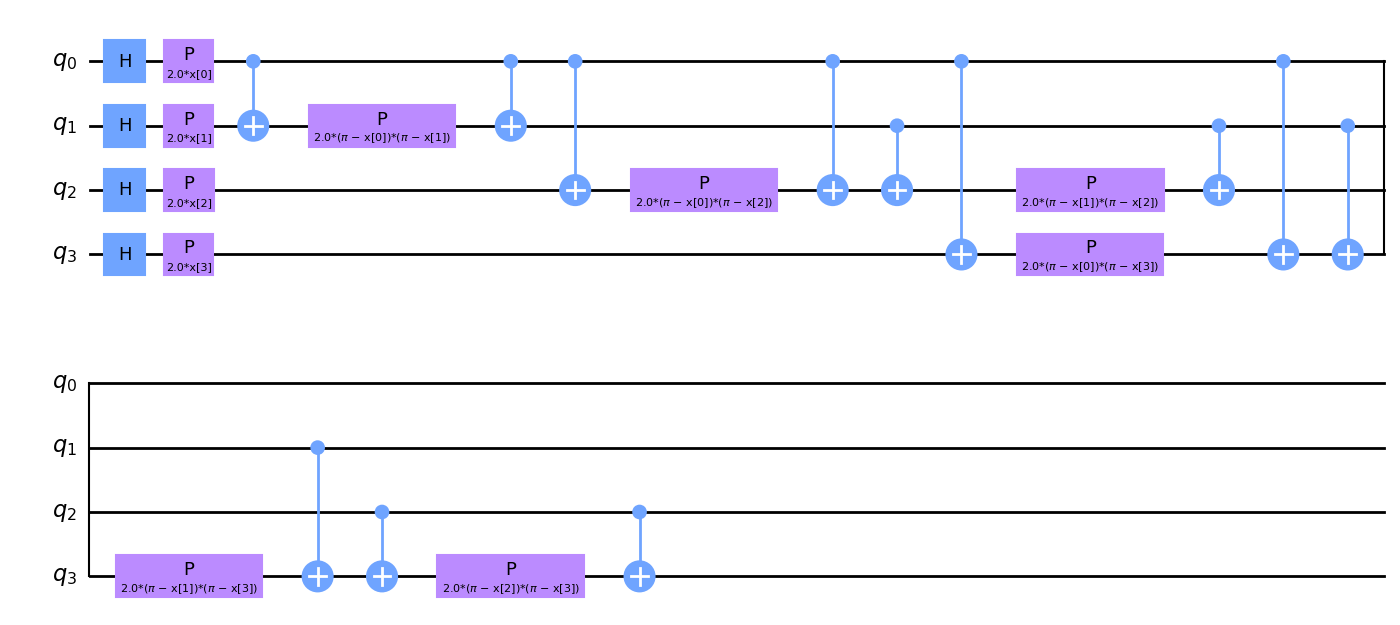

In [6]:
from qiskit.circuit.library import ZZFeatureMap
num_features = features.shape[1]
feature_map = ZZFeatureMap(feature_dimension=num_features, reps=1) # create the feature map for the quantum model
feature_map.decompose().draw(output="mpl", fold=20)

In [7]:
from qiskit.primitives import Sampler
sampler = Sampler() #create the sampler (Qiskit Aer Statevector Simulator) for the quantum model

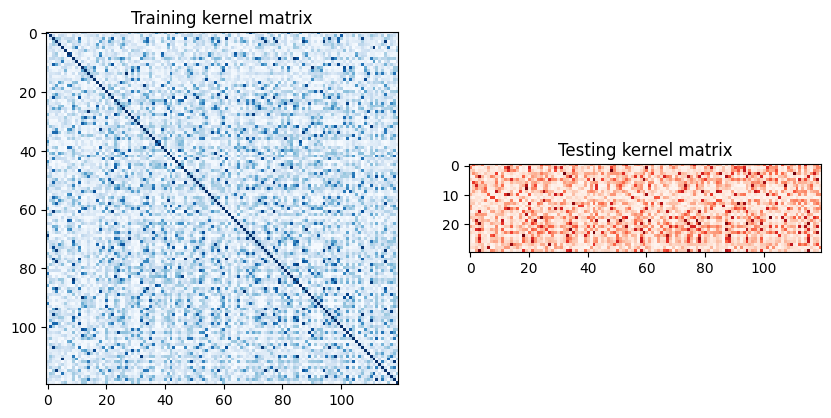

In [8]:
from qiskit_algorithms.state_fidelities import ComputeUncompute
from qiskit_machine_learning.kernels import FidelityQuantumKernel
from qiskit_machine_learning.algorithms import QSVC
import matplotlib.pyplot as plt
import numpy as np
fidelity = ComputeUncompute(sampler=sampler) #define the quantum kernel 
kernel = FidelityQuantumKernel(fidelity=fidelity, feature_map=feature_map)
matrix_train = kernel.evaluate(x_vec=train_features)
matrix_test = kernel.evaluate(x_vec=test_features, y_vec=train_features)

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(
    np.asmatrix(matrix_train), interpolation="nearest", origin="upper", cmap="Blues"
)
axs[0].set_title("Training kernel matrix")
axs[1].imshow(np.asmatrix(matrix_test), interpolation="nearest", origin="upper", cmap="Reds")
axs[1].set_title("Testing kernel matrix")
plt.show()

In [9]:
qsvc = QSVC( #use QSVC to train the quantum model
    quantum_kernel=kernel,
)
qsvc.fit(train_features, train_labels)

QSVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
     decision_function_shape='ovr', degree=3, gamma='scale', max_iter=-1,
     probability=False,
     quantum_kernel=<qiskit_machine_learning.kernels.fidelity_quantum_kernel.FidelityQuantumKernel object at 0x000002129270F520>,
     random_state=123, shrinking=True, tol=0.001, verbose=False)

In [10]:
qsvc_train_score = qsvc.score(train_features, train_labels) #Print the scores of the quantum model
qsvc_test_score = qsvc.score(test_features, test_labels)
print(f"QSVC classification train score: {qsvc_train_score}")
print(f"QSVC classification test score: {qsvc_test_score}")

QSVC classification train score: 0.9916666666666667
QSVC classification test score: 0.9666666666666667
